### 사용자와 친구 관계

In [1]:
users = [
    { "id": 0, "name": "Hero" },
    { "id": 1, "name": "Dunn"},
    { "id": 2, "name": "Sue" },
    { "id": 3, "name": "Chi" },
    { "id": 4, "name": "Thor" },
    { "id": 5, "name": "Clive" },
    { "id": 6, "name": "Hicks" },
    { "id": 7, "name": "Devin" },
    { "id": 8, "name": "Kate" },
    { "id": 9, "name": "Klein" }
]

friendships = [
    (0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
    (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)
]

for user in users:
    user['friends'] = []

for i, j in friendships:
    users[i]['friends'].append(users[j])
    users[j]['friends'].append(users[i])

### 각 사용자의 평균 연결 수는?

In [2]:
# 파이썬 하위 버전 호환을 위한 모듈
# future 의 division은 소수점까지 출력한다
from __future__ import division

def number_of_friends(user):
    return len(user['friends'])

total_connections = sum(number_of_friends(user) for user in users)

print 'Total Connections: ', total_connections

num_users = len(users)

avg_connections = total_connections / num_users

print 'Avg Connections: ', avg_connections

Total Connections:  24
Avg Connections:  2.4


### 친구가 가장 많은 사용자는? 가장 적은 사용자는?

In [10]:
num_friends_by_id = [(user["id"], number_of_friends(user)) for user in users]

# 친구가 많은 순으로 정렬한다
friends_sorted = sorted(num_friends_by_id,
      key=lambda (user_id, num_friends): num_friends,
      reverse=True)

print friends_sorted

[(1, 3), (2, 3), (3, 3), (5, 3), (8, 3), (0, 2), (4, 2), (6, 2), (7, 2), (9, 1)]


### 친구 추천하기

In [16]:
def friends_of_friend_ids_bad(user):
    # foaf = 친구의 친구 (friend of a friend)
    return [foaf["id"]
            for friend in user["friends"]
            for foaf in friend["friends"]]
    # 리스트 컴프리헨션이 2개가 연속으로 나올 땐 첫 번째 것부터 사용되는 모양이다

print friends_of_friend_ids_bad(users[0])

# 나, 내 친구가 목록에 중복으로 포함되어 있는 문제가 있다


[0, 2, 3, 0, 1, 3]


### 서로가 함께 아는 친구 (mutual friends)

In [27]:
from collections import Counter

def not_the_same(user, other_user):
    """같은 사람인지 여부"""
    return user['id'] != other_user['id']

def not_friends(user, other_user):
    """other_user가 친구에 포함되어 있지 않은지 확인"""
    return all(not_the_same(friend, other_user)
              for friend in user['friends'])

def friends_of_friend_ids(user):
    return Counter(foaf['id']
                  for friend in user['friends'] # 사용자의 각 친구들에 대해
                  for foaf in friend['friends'] # 그 친구의 친구들 중에서
                  if not_the_same(user, foaf) # 내가 아니고
                  and not_friends(user, foaf)) # 친구가 아닌 친구의 수만 센다
    # 리스트 컴프리헨션 이후에 나오는 조건문은 리스트의 필터 역할을 한다


# id가 3인 친구의 친구들 중, 내 친구가 아닌 사람들
# {0: 2}라는 건, id가 0인 사용자가, 내 친구들 2명과 친구라는 의미이다
print friends_of_friend_ids(users[3])



Counter({0: 2, 5: 1})


### 관심사로 공유

In [30]:
interests = [
    (0, 'Hadoop'), (0, 'Big Data'), (0, 'HBase'), (0, 'Java'), (0, 'Spark'), (0, 'Storm'), (0, 'Cassandra'),
    (1, 'NoSQL'), (1, 'MongoDB'), (1, 'Cassandra'), (1, 'Postgres'),
    (2, 'Python'), (2, 'scikit-learn'), (2, 'scipy'), (2, 'numpy'), (2, 'statsmodels'), (2, 'pandas'),
    (3, 'R'), (3, 'Python'), (3, 'statistics'), (3, 'regression'), (3, 'probability'),
    (4, 'machine learning'), (4, 'regression'), (4, 'decision trees'), (4, 'libsvm'),
    (5, 'Python'), (5, 'R'), (5, 'Java'), (5, 'C++'), (5, 'Haskell'), (5, 'programming language'),
    (6, 'statistics'), (6, 'probability'), (6, 'machine learning'), (6, 'theory'),
    (7, 'machine learning'), (7, 'scikit-learn'), (7, 'Mahout'), (7, 'neural networks'),
    (8, 'neural networks'), (8, 'deep learning'), (8, 'Big Data'), (8, 'artificial intelligence'),
    (9, 'Hadoop'), (9, 'Java'), (9, 'MapReduce'), (9, 'Big Data')
]

def data_scientists_who_like(target_interest):
    return [user_id
           for user_id, user_interest in interests
           if user_interest == target_interest]

print data_scientists_who_like('machine learning')

[4, 6, 7]


이렇게 하면 관심사에 대한 사용자를 가져올 수 있지만 매 호출마다 전체 관심사를 훑어야 한다.
인덱스를 만들어둬보자.

In [34]:
from collections import defaultdict

# 관심사에 대한 사용자 인덱스를 만든다
# defaultdict를 사용하면 키에 해당하는 값을 list로 초기화할 수 있는 모양이다
user_ids_by_interest = defaultdict(list)

for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)

# 사용자에 대한 관심사 인덱스도 만들어둔다
interests_by_user_id = defaultdict(list)

for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)

# 나와 동일한 관심사를 가진 사용자의 목록
def most_common_interests_with(user):
    return Counter(interested_user_id
                  for interest in interests_by_user_id[user['id']]
                  for interested_user_id in user_ids_by_interest[interest]
                  if interested_user_id != user['id'])

print most_common_interests_with(users[3])

Counter({5: 2, 6: 2, 2: 1, 4: 1})


### 연봉과 경력 정보 분석

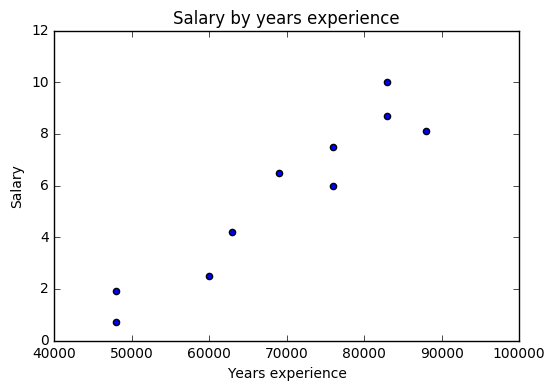

In [41]:
from matplotlib import pyplot as plt

# 연봉과 근속 기간(년)
salaries_and_tenures = [
    (83000, 8.7), (88000, 8.1),
    (48000, 0.7), (76000, 6),
    (69000, 6.5), (76000, 7.5),
    (60000, 2.5), (83000, 10),
    (48000, 1.9), (63000, 4.2)
]

plt.scatter(
    [salary for salary, tenure in salaries_and_tenures],
    [tenure for salary, tenure in salaries_and_tenures]
)
plt.title('Salary by years experience')
plt.ylabel('Salary')
plt.xlabel('Years experience')
plt.show()

산점도를 그려보면 경력에 따라 연봉이 올라가는 걸 알 수 있다.
좀 더 흥미로운 정보는 어떻게 찾을 수 있을까?

먼저 근속 연수에 따라 평균 연봉이 어떻게 바뀌는지 살펴보자.

In [50]:
# 근속 연수에 따른 연봉
salary_by_tenure = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    salary_by_tenure[tenure].append(salary)
    
# 평균 연봉
average_salary_by_tenure = {
    tenure : sum(salaries) / len(salaries)
    for tenure, salaries in salary_by_tenure.items()
}
# 딕셔너리를 반복하면서, 맵을 만들 수 있음 (map()과 동일한 듯)

print average_salary_by_tenure


# 튜블의 배열로 만들 수도 있을 듯
average_salaries = sorted([
    (tenure, sum(salaries) / len(salaries))
    for tenure, salaries in salary_by_tenure.items()
])
print average_salaries

{6.5: 69000.0, 7.5: 76000.0, 6: 76000.0, 10: 83000.0, 8.1: 88000.0, 4.2: 63000.0, 8.7: 83000.0, 0.7: 48000.0, 1.9: 48000.0, 2.5: 60000.0}
[(0.7, 48000.0), (1.9, 48000.0), (2.5, 60000.0), (4.2, 63000.0), (6, 76000.0), (6.5, 69000.0), (7.5, 76000.0), (8.1, 88000.0), (8.7, 83000.0), (10, 83000.0)]


하지만, 근속 연수가 같은 사람이 한 명도 없어서 결과가 쓸모 있어 보이지 않는다.  
근속 기간을 몇 개의 구간으로 나눠보자.

In [57]:
def tenure_bucket(tenure):
    if tenure < 2:
        return 'less than two'
    elif tenure < 5:
        return 'between two and five'
    else:
        return 'more than five'

salary_by_tenure_bucket = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    salary_by_tenure_bucket[tenure_bucket(tenure)].append(salary)

average_salary_by_bucket = {
    tenure_bucket: sum(salaries) / len(salaries)
    for tenure_bucket, salaries in salary_by_tenure_bucket.iteritems()
}

# iteritems는 전체 리스트 대신 generator를 리턴한다
# http://stackoverflow.com/questions/10458437/what-is-the-difference-between-dict-items-and-dict-iteritems

print average_salary_by_bucket

{'more than five': 79166.66666666667, 'between two and five': 61500.0, 'less than two': 48000.0}


5년 이상 경력의 데이터 과학자들은, 경력이 없거나 2년 이하의 과학자들보다 65%나 더 번다.

In [59]:
print average_salary_by_bucket['more than five'] / average_salary_by_bucket['less than two'] * 100

164.930555556


버킷을 1년 단위로 설정해볼 수도 있다.

In [60]:
def each_year_tenure(tenure):
    return round(tenure)

salary_by_each_year_tenure = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    salary_by_each_year_tenure[each_year_tenure(tenure)].append(salary)

average_salary_by_each_year_tenure = {
    each_year_tenure: sum(salaries) / len(salaries)
    for each_year_tenure, salaries in salary_by_each_year_tenure.iteritems()
}

print average_salary_by_each_year_tenure

{1.0: 48000.0, 2.0: 48000.0, 3.0: 60000.0, 4.0: 63000.0, 6.0: 76000.0, 7.0: 69000.0, 8.0: 82000.0, 9.0: 83000.0, 10.0: 83000.0}
